# Data Breach Analysis using VCDB

[Veris Community](http://veriscommunity.net/index.html) compiles information security breaches and incidents based on a standard. They also maintain database of incidents - [VCDB](http://veriscommunity.net/vcdb.html) regularly updated by the community. 


Tokern analyzed the dataset with a focus on insider threats and database breaches. The key findings are:
- 47% of incidents were due to *internal* actors.
- 14% of incidents involved a database system

Among incidents involving a database system:
- 60% of incidents involved *internal* actors.
- 70% of incidents were due to *misuse*, *error* or *social*


## Overview of the dataset

The VCDB database as Dec 13 2019, had data on **8352** incidents. Of these **8031** incidents were for years 2010
and onwards.

A histogram of incidents per year is shown below:

In [51]:
# Read Zipped JSON

import os
import json
import zipfile


path = os.path.join("/", "home","rajat", "osrc","VCDB", 
                    "data", "joined", "vcdb.json.zip")

records = None

with zipfile.ZipFile(os.path.abspath(path)) as z:
    for file in z.namelist():
        with z.open(file) as f:
            records = json.loads(f.read().decode("utf-8"))
            

In [52]:
# Plot records per year

count = {
    'year': {},
    'actor': {},
    'asset': {},
    'action': {},
    'cloud': {}
}

database_count = {
    'year': {},
    'actor': {},
    'asset': {},
    'action': {},
    'cloud': {}
}


total = 0
total_interesting = 0
database_interesting = 0

for r in records:
    year = r['timeline']['incident']['year']
    values = {
        'actor': r['actor'].keys(),
        'asset': [asset['variety'] for asset in r['asset']['assets']],
        'action': r['action'].keys(),
        'cloud': r['asset']['cloud']
    }
    
    total += 1
    if year > 2009:
        total_interesting += 1
        if 'S - Database' in values['asset']:
            database_interesting += 1

        if year in count['year']:
            count['year'][year] += 1
        else:
            count['year'][year] = 1
        
        for key in ['actor', 'asset', 'action', 'cloud']:
            for val in values[key]:
                if val in count[key]:
                    count[key][val] += 1
                else:
                    count[key][val] = 1
                
                if 'S - Database' in values['asset']:
                    if val in database_count[key]:
                        database_count[key][val] += 1
                    else:
                        database_count[key][val] = 1

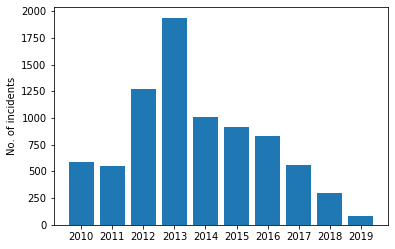

<Figure size 1296x1152 with 0 Axes>

In [53]:
# Plot a bar graph by year
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(len(count['year'].keys()))

x_labels = sorted(count['year'].keys())

p1 = plt.bar(ind, [count['year'][k] for k in x_labels])
plt.ylabel('No. of incidents')
plt.xticks(ind, x_labels)
plt.figure(figsize=(18, 16))
plt.show()

### Actors

The incidents were almost equally caused by *external* and *internal* (including partners) actors. The pie chart below shows the split. 

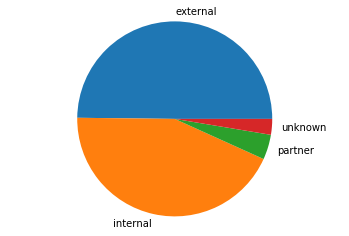

In [54]:
# Generate a pie chart by actor

fig1, ax1 = plt.subplots()

key = 'actor'
ax1.pie([count[key][k] for k in sorted(count[key].keys())], 
        labels=sorted(count[key].keys()))
ax1.axis('equal')

plt.show()

### Assets

The top assets compromised in the incidents were
- personal devices including laptop and mobiles
- documents
- web applications
- databases

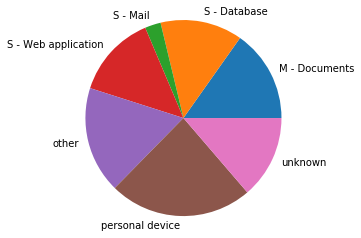

In [55]:
import re

key = 'asset'

def combine_assets(asset_count, cutoff_percent):

    combined_other = {
        'other': 0,
        'personal device': 0,
        'unknown': 0
    }

    unknown_regex = re.compile("Unknown")
    personal_device_regex = re.compile("Desktop|Laptop|Desktop or laptop")

    for asset in asset_count:
        if asset_count[asset] < total_interesting * cutoff_percent/100:
            combined_other['other'] += asset_count[asset]
        elif unknown_regex.search(asset):
            combined_other['unknown'] += asset_count[asset]
        elif personal_device_regex.search(asset):
            combined_other['personal device'] += asset_count[asset]
        else:
            combined_other[asset] = asset_count[asset]
            
    return combined_other

cutoff_percent = 3
combined_other = combine_assets(count[key], cutoff_percent)

fig1, ax1 = plt.subplots()
ax1.pie([combined_other[k] for k in sorted(combined_other.keys())], 
        labels=sorted(combined_other.keys()))
ax1.axis('equal')

plt.show()

### Actions

Action describes the method used in the incident. The pie chart below shows the percentage of actions.

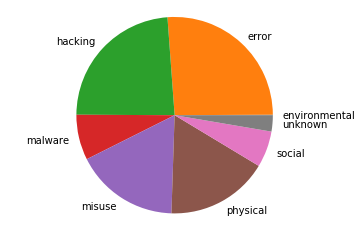

In [56]:
fig1, ax1 = plt.subplots()

key = 'action'
ax1.pie([count[key][k] for k in sorted(count[key].keys())], 
        labels=sorted(count[key].keys()))
ax1.axis('equal')

plt.show()

## Database Incidents

This section focuses on incidents in which a database is involved. *14%* of incidents involved a database.


### Actors

Contrary to the complete dataset, internal actors and partners were involved in majority of the incidents.


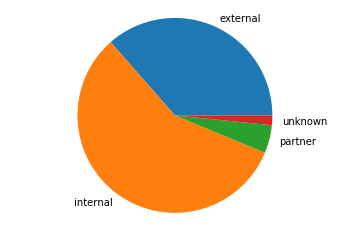

In [57]:
# Generate a pie chart for databases

key = 'actor'

fig1, ax1 = plt.subplots()

ax1.pie([database_count[key][k] for k in sorted(database_count[key].keys())], 
        labels=sorted(database_count[key].keys()))
ax1.axis('equal')


plt.show()

### Actions

Similarly the trend w.r.t actions is also different. *misuse* was the primary reason for the security incident.

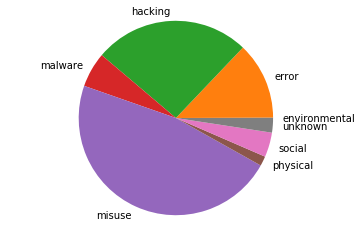

In [58]:
key = 'action'

fig1, ax1 = plt.subplots()

ax1.pie([database_count[key][k] for k in sorted(database_count[key].keys())], 
        labels=sorted(database_count[key].keys()))
ax1.axis('equal')


plt.show()

## Conclusion

VCDB is a very granular database with the ability to drill down along many dimensions. In this report, we studied the important factors in database breach related incidents. To avoid database breaches, it is important to plan for misuse and insider threats. 
